In [36]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

%matplotlib inline
sb.set(color_codes= True)

In [37]:
rind= pd.read_csv('./rindia.csv')

In [38]:
print ("Shape of the scraped data = ", rind.shape)
rind.tail(5)


Shape of the scraped data =  (988, 10)


,title,url,comms_num,flair,score,id,created,author,body,timestamp
983,1960s :: Physicist C.V.Raman Teaching In Class,https://i.redd.it/1krjcd8vvfk11.jpg,73,Science/Technology,1398,9d7nxf,1.536190e+09,KKLeaks,NaN,2018-09-06 05:04:47
984,"The hero we need, but not the one we deserve",https://i.redd.it/yff9ak6yw5k11.png,123,[R]eddiquette,1399,9csy4k,1.536070e+09,PM_Me_Thick_Muffins,NaN,2018-09-04 19:33:26
985,"In Kolkata, a College Admission Form Allows Yo...",https://www.news18.com/news/buzz/in-kolkata-a-...,149,Non-Political,1394,bv48s2,1.559314e+09,wordswithmagic,NaN,2019-05-31 20:17:02
986,"It is not truth that matters, but victory.",https://i.redd.it/n9fpvx7yv3j41.jpg,96,Politics,1399,f9dv6z,1.582681e+09,hadi_xyz,NaN,2020-02-26 07:06:12
987,"Rare pic of Einstein, Yukawa (1st Japanese Nob...",https://i.redd.it/6yc0paemo9pz.jpg,81,Non-Political,1401,73nlaf,1.506914e+09,Renderdog,NaN,2017-10-02 08:37:56


In [39]:
rind.dtypes


title         object
url           object
comms_num      int64
flair         object
score          int64
id            object
created      float64
author        object
body          object
timestamp     object
dtype: object

In [40]:
rind = rind.drop(['created'], axis = 1)


In [41]:
rind=rind.rename(columns={"comms_num":"comments"})
rind.head(50)

,title,url,comments,flair,score,id,author,body,timestamp
0,Will donate thrice the number of upvotes (amou...,https://www.reddit.com/r/india/comments/981o7s...,832,[R]eddiquette,19701,981o7s,TheBeginnerr,>**Note**: If you want to know what this is al...,2018-08-18 01:32:17
1,Indian reply to NYtimes cartoon on Paris clima...,http://imgur.com/a/U48v9,1492,/r/all,18243,6f10op,spikyraccoon,NaN,2017-06-04 02:17:25
2,"The essence of the Indian soap opera, distille...",https://gfycat.com/DigitalSparseAkitainu,946,r/all,18205,8pymkp,GlanirBhavti,NaN,2018-06-10 18:16:29
3,Fuck all Religion,https://www.reddit.com/r/india/comments/f9outu...,4198,Politics,17869,f9outu,pking3,"Fuck all religion. Fuck Hindusim, fuck Islam, ...",2020-02-26 19:40:49
4,German exchange Student at IIT Madras is being...,https://i.redd.it/j816l4c40i641.jpg,501,Politics,11712,eev8g5,beethoven45,NaN,2019-12-24 16:40:46
5,Tragedy of India,http://i.imgur.com/sgzTMyR.jpg,342,r/all,11262,4s5bpn,hd-86,NaN,2016-07-11 02:10:21
6,Today's The Hindu,https://i.redd.it/rtb6b6xk15o41.jpg,179,Coronavirus,10995,fmsjoc,constantinopleF,NaN,2020-03-22 16:20:29
7,"If you are not moved by this picture, I wish I...",https://pbs.twimg.com/media/Dmb1s-rV4AAZdBX.jpg,382,Non-Political,10783,9dt64s,Whatay,NaN,2018-09-08 00:18:18
8,Megathread: India-Pakistan border skirmish,https://www.reddit.com/r/india/comments/avafxp...,6913,[R]eddiquette,10205,avafxp,doc_two_thirty,There is a lot of news and speculation coming ...,2019-02-27 20:26:35
9,"""From midnight the entire country will go unde...",https://twitter.com/TheQuint/status/1242460593...,1428,Politics [Megathread],10046,fo661m,Neglectedsince1994,NaN,2020-03-25 04:08:46


In [57]:
rind.dtypes

title        object
url          object
comments      int64
flair        object
score         int64
id           object
author       object
body         object
timestamp    object
dtype: object

In [58]:
print(rind.isnull().sum())

title          0
url            0
comments       0
flair          1
score          0
id             0
author        51
body         924
timestamp      0
dtype: int64


In [59]:
duplicate_rows_rind = rind[rind.duplicated()]
print(duplicate_rows_rind.shape)


(0, 9)


In [45]:
rind.count()

title        988
url          988
comments     988
flair        987
score        988
id           988
author       937
body          64
timestamp    988
dtype: int64

In [60]:
rind = rind.drop_duplicates()
rind.tail()

,title,url,comments,flair,score,id,author,body,timestamp
983,1960s :: Physicist C.V.Raman Teaching In Class,https://i.redd.it/1krjcd8vvfk11.jpg,73,Science/Technology,1398,9d7nxf,KKLeaks,NaN,2018-09-06 05:04:47
984,"The hero we need, but not the one we deserve",https://i.redd.it/yff9ak6yw5k11.png,123,[R]eddiquette,1399,9csy4k,PM_Me_Thick_Muffins,NaN,2018-09-04 19:33:26
985,"In Kolkata, a College Admission Form Allows Yo...",https://www.news18.com/news/buzz/in-kolkata-a-...,149,Non-Political,1394,bv48s2,wordswithmagic,NaN,2019-05-31 20:17:02
986,"It is not truth that matters, but victory.",https://i.redd.it/n9fpvx7yv3j41.jpg,96,Politics,1399,f9dv6z,hadi_xyz,NaN,2020-02-26 07:06:12
987,"Rare pic of Einstein, Yukawa (1st Japanese Nob...",https://i.redd.it/6yc0paemo9pz.jpg,81,Non-Political,1401,73nlaf,Renderdog,NaN,2017-10-02 08:37:56


In [61]:
rind=rind.dropna()

In [62]:
print(rind.isnull().sum())


title        0
url          0
comments     0
flair        0
score        0
id           0
author       0
body         0
timestamp    0
dtype: int64


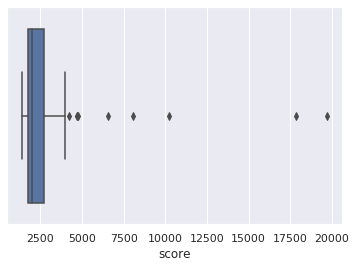

In [63]:
sb.boxplot(x=rind['score'])

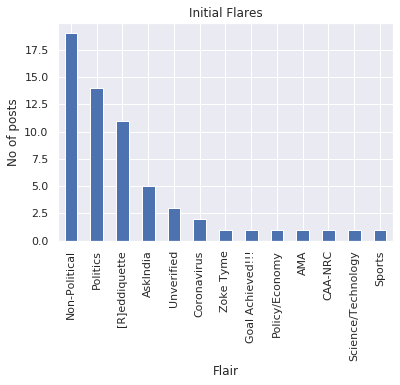

In [64]:
rind['flair'].value_counts().plot(kind= 'bar');
plt.xlabel('Flair');
plt.ylabel('No of posts');
plt.title('Initial Flares');



In [65]:
rind.to_csv('rindiaeda.csv', index=False) 